# Set Variables

In [1]:
# -------- bad smell
# bad_smell = "CC" # Cyclomatic Complexity
bad_smell = "DE" # Design
# bad_smell = "NC" # Npath Complexity


# --------
my_keyword_Based = True
my_conv_kernel_output_channel = 64
my_balance_train = False


# --------
if my_conv_kernel_output_channel == 64:
    output_version = 2
else: # my_conv_kernel_output_channel == 8
    output_version = 3


if my_balance_train:
    file_subversion = ".2-balanced"
else:
    file_subversion = ".1-imbalance"

# Google Colab

In [2]:
sub_folders = {
    "camel":      "camel_"       + bad_smell,
    "cloudstack": "cloudstack_"  + bad_smell,
    "geode":      "geode_"       + bad_smell,
    "hbase":      "hbase_"       + bad_smell
}

In [3]:
dataset_file_names = {
    "camel":      "camel_DE - v.02",
    "cloudstack": "cloudstack_DE - v.01",
    "geode":      "geode_DE - v.01",
    "hbase":      "hbase_DE - v.01"
}

In [4]:
tempPre = "E:/darsy/00/02- arshad/10- paper code/"
tempOutput = "01- Jupyter Notebook/Direct Method/00. Output/"

In [5]:
pre_path_outputs = {}
for k, v in dataset_file_names.items():
    pre_path_outputs[k] = tempPre + tempOutput + k + "/" + sub_folders[k] + "/" + v + "/"

# Libs

In [6]:
import json
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from operator import truediv

from matplotlib.ticker import MaxNLocator

In [7]:
# import nltk
# nltk.download("stopwords")

In [8]:
!python -V
import matplotlib
print(matplotlib.__version__)

Python 3.7.11
3.5.0


# Config

In [9]:
mypaths = {}

for k, v in dataset_file_names.items():
    if my_keyword_Based:
        mypaths[k] = pre_path_outputs[k] + "performances/tfidf-performance-v{}{}.json".format(output_version, "{}")
    else:
        mypaths[k] = pre_path_outputs[k] + "performances/w2v-performance-v{}{}.json".format(output_version, "{}")
    
    # -----
    
    if my_balance_train:
        mypaths[k] = mypaths[k].format(".2-balanced")
    else:
        mypaths[k] = mypaths[k].format(".1-imbalance")

In [10]:
mypaths

{'camel': 'E:/darsy/00/02- arshad/10- paper code/01- Jupyter Notebook/Direct Method/00. Output/camel/camel_DE/camel_DE - v.02/performances/tfidf-performance-v2.1-imbalance.json',
 'cloudstack': 'E:/darsy/00/02- arshad/10- paper code/01- Jupyter Notebook/Direct Method/00. Output/cloudstack/cloudstack_DE/cloudstack_DE - v.01/performances/tfidf-performance-v2.1-imbalance.json',
 'geode': 'E:/darsy/00/02- arshad/10- paper code/01- Jupyter Notebook/Direct Method/00. Output/geode/geode_DE/geode_DE - v.01/performances/tfidf-performance-v2.1-imbalance.json',
 'hbase': 'E:/darsy/00/02- arshad/10- paper code/01- Jupyter Notebook/Direct Method/00. Output/hbase/hbase_DE/hbase_DE - v.01/performances/tfidf-performance-v2.1-imbalance.json'}

In [11]:
preprocessing_params = {
    "keyword_Based": my_keyword_Based
}

In [12]:
bcd_colours = ["blue", "green", "red"]

# my_whole_datas

In [13]:
my_whole_datas = {}
for k, v in mypaths.items():
    with open(v) as filehandle:
        my_whole_datas[k] = json.load(filehandle)

In [14]:
class_labels = my_whole_datas["camel"]["preprocessing_params"]["bug_classes"]
epochs = my_whole_datas["camel"]["train_params"]["epochs"]

In [15]:
print(class_labels)
print(epochs)

[0, 1]
20


In [16]:
best_step_labels = {}
best_step_indexs = {}
datas = {}

for k, mwd in my_whole_datas.items():
    best_step_labels[k] = mwd["model_results"]["validation"]["best_at_step"]
    best_step_indexs[k] = mwd["model_results"]["validation"]["best_at_step"] - 1
    datas[k] = mwd["model_results"]

In [17]:
print(best_step_labels)
print(best_step_indexs)

{'camel': 3, 'cloudstack': 2, 'geode': 1, 'hbase': 4}
{'camel': 2, 'cloudstack': 1, 'geode': 0, 'hbase': 3}


In [18]:
ls = "solid"
lw = 1
lw_test = 5
marker = "."
marker_test = "o"
# train_data_status = train_data_status

colours = {
    "camel":      "red",
    "cloudstack": "blue",
    "geode":      "green",
    "hbase":      "orange"
}

# plot_acc_cost_

In [24]:
for k, mwd in my_whole_datas.items():
    print("-" * 10, k)
    for i, acc in enumerate(datas[k]["validation"]["accuracy"]):
        print(i + 1, round(acc, 1))

---------- camel
1 66.2
2 65.7
3 66.4
4 66.2
5 64.7
6 63.7
7 65.0
8 65.2
9 65.1
10 65.1
11 63.7
12 64.6
13 63.9
14 64.2
15 64.1
16 63.9
17 64.5
18 64.1
19 63.7
20 63.9
---------- cloudstack
1 70.4
2 71.9
3 65.0
4 71.3
5 71.2
6 70.7
7 70.7
8 71.2
9 71.2
10 70.9
11 71.5
12 71.3
13 71.2
14 71.3
15 71.2
16 71.2
17 70.9
18 71.6
19 71.6
20 71.3
---------- geode
1 77.0
2 76.9
3 76.2
4 77.0
5 76.6
6 76.3
7 76.5
8 76.2
9 76.5
10 76.6
11 76.5
12 76.5
13 76.5
14 75.9
15 76.3
16 76.3
17 75.1
18 76.2
19 75.2
20 76.5
---------- hbase
1 66.2
2 65.6
3 65.7
4 67.5
5 65.5
6 66.1
7 64.7
8 65.4
9 66.3
10 65.5
11 64.8
12 65.0
13 64.9
14 65.7
15 65.1
16 65.2
17 65.0
18 65.5
19 65.1
20 64.9


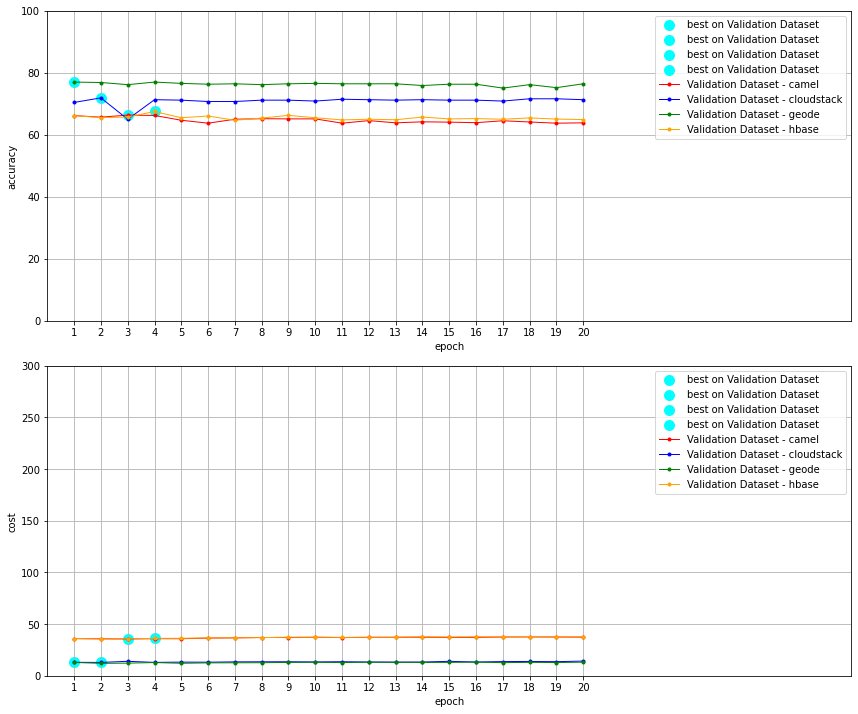

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

mymetrics = ["accuracy", "cost"]
my_x = range(1, epochs + 1, 1)

for ax, metric in zip(axes, mymetrics):
    ax.get_xaxis().set_major_locator(MaxNLocator(integer=True))

    if metric == "accuracy":
        for k, mwd in my_whole_datas.items():
            ax.set_ylim([0, 100])
            ax.scatter(best_step_labels[k], datas[k]["validation"]["best_acc"], 
                       label="best on Validation Dataset", color="cyan", lw=lw_test, marker=marker_test)
    else:
        for k, mwd in my_whole_datas.items():
            ax.set_ylim([0, 300])
            ax.scatter(best_step_labels[k], datas[k]["validation"]["cost"][best_step_indexs[k]], 
                       label="best on Validation Dataset", color="cyan", lw=lw_test, marker=marker_test)

    for k, mwd in my_whole_datas.items():
        ax.plot(my_x, metric, data=datas[k]["validation"], label="Validation Dataset - {}".format(k), 
                color=colours[k], linestyle=ls, lw=lw, marker=marker)

    ax.set_xlim([0, 30])
    ax.set_xlabel("epoch")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

    ax.get_xaxis().set_ticks( list(range(1, epochs + 1)) )
# --- end for

fig.tight_layout(pad=1.0)

# call

In [21]:
my_path =   "D:/SAVE/Tests/"
file_name = "Direct Method - v06-dpi=1000.jpg"
full_path = my_path + file_name

resolution_value = 1000

fig.savefig(full_path, format="jpg", dpi=resolution_value)